In [1]:
import geopandas as gpd

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read in the data
full_data = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\DEC_lands\\DEC_lands\\DEC_lands.shp")

# View the first five rows of the data
full_data.head()

OBJECTID          CATEGORY UNIT                          FACILITY  \
0         1  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
1         2  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
2         3  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
3         4  FOR PRES DET PAR  CFP  GREENE COUNTY FP DETACHED PARCEL   
4         6   FOREST PRESERVE  AFP         SARANAC LAKES WILD FOREST   

         CLASS            UMP                       DESCRIPTIO  REGION  \
0  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
1  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
2  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
3  WILD FOREST           None                             None       4   
4  WILD FOREST  SARANAC LAKES                             None       5   

     COUNTY                                     URL            SOURCE UPDATE_  \
0  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
1  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
2  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
3    GREENE                  http://www.dec.ny.gov/        GREENE RPP    5/12   
4     ESSEX  http://www.dec.ny.gov/lands/22593.html  DECRP, ESSEX RPP   12/96   

      OFFICE       ACRES  LANDS_UID GREENCERT    SHAPE_AREA    SHAPE_LEN  \
0   STAMFORD  738.620192        103         N  2.990365e+06  7927.662385   
1   STAMFORD  282.553140       1218         N  1.143940e+06  4776.375600   
2   STAMFORD  234.291262       1780         N  9.485476e+05  5783.070364   
3   STAMFORD  450.106464       2060         N  1.822293e+06  7021.644833   
4  RAY BROOK   69.702387       1517         N  2.821959e+05  2663.909932   

                                            geometry  
0  POLYGON ((486093.245 4635308.586, 486787.235 4...  
1  POLYGON ((491931.514 4637416.256, 491305.424 4...  
2  POLYGON ((486000.287 4635834.453, 485007.550 4...  
3  POLYGON ((541716.775 4675243.268, 541217.579 4...  
4  POLYGON ((583896.043 4909643.187, 583891.200 4...

In [3]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [5]:
# How many lands of each type are there?
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

CLASS    COUNTY                                           geometry
0  WILD FOREST  DELAWARE  POLYGON ((486093.245 4635308.586, 486787.235 4...
1  WILD FOREST  DELAWARE  POLYGON ((491931.514 4637416.256, 491305.424 4...
2  WILD FOREST  DELAWARE  POLYGON ((486000.287 4635834.453, 485007.550 4...
3  WILD FOREST    GREENE  POLYGON ((541716.775 4675243.268, 541217.579 4...
4  WILD FOREST     ESSEX  POLYGON ((583896.043 4909643.187, 583891.200 4...

<Axes: >

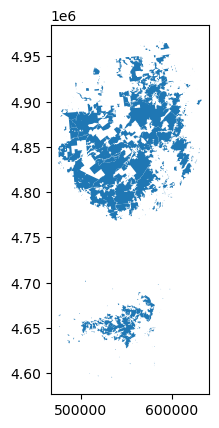

In [7]:
wild_lands.plot()

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [9]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\DEC_pointsinterest\\DEC_pointsinterest\\Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\DEC_roadstrails\\DEC_roadstrails\\Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\NY_county_boundaries\\NY_county_boundaries\\NY_county_boundaries.shp")

<Axes: >

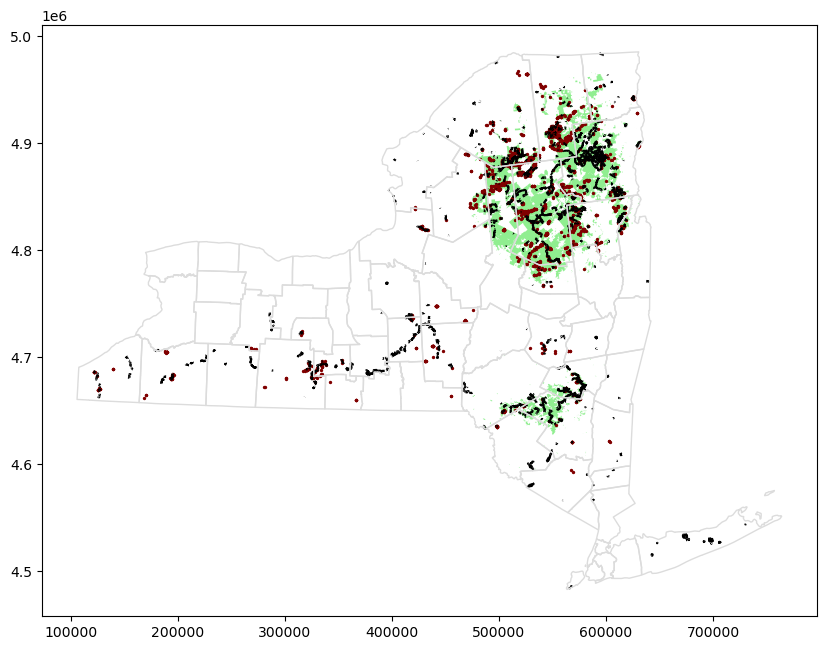

In [10]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

In [11]:
loans_filepath = "C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\kiva_loans\\kiva_loans\\kiva_loans.shp"

# Your code here: Load the data
world_loans =gpd.read_file(loans_filepath)


In [12]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10896\4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<Axes: >

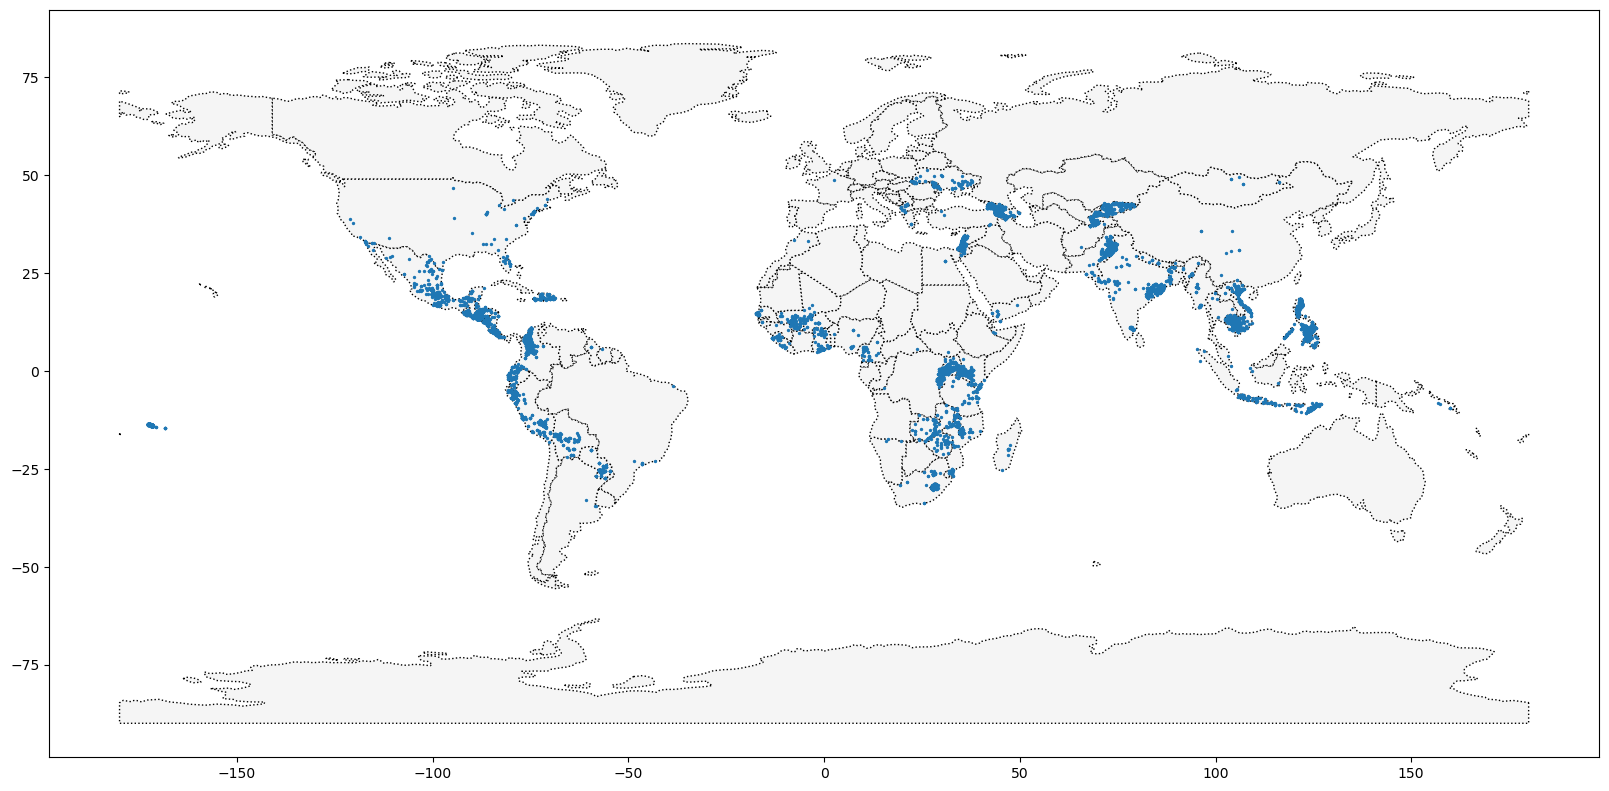

In [13]:
ax=world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

In [14]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()



In [16]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\Philippines_AL258.kml", driver='KML')
PHL.head()

Name Description  \
0  Autonomous Region in Muslim Mindanao               
1                          Bicol Region               
2                        Cagayan Valley               
3                            Calabarzon               
4                                Caraga               

                                            geometry  
0  MULTIPOLYGON (((119.46690 4.58718, 119.46653 4...  
1  MULTIPOLYGON (((124.04577 11.57862, 124.04594 ...  
2  MULTIPOLYGON (((122.51581 17.04436, 122.51568 ...  
3  MULTIPOLYGON (((120.49202 14.05403, 120.49201 ...  
4  MULTIPOLYGON (((126.45401 8.24400, 126.45407 8...

<Axes: >

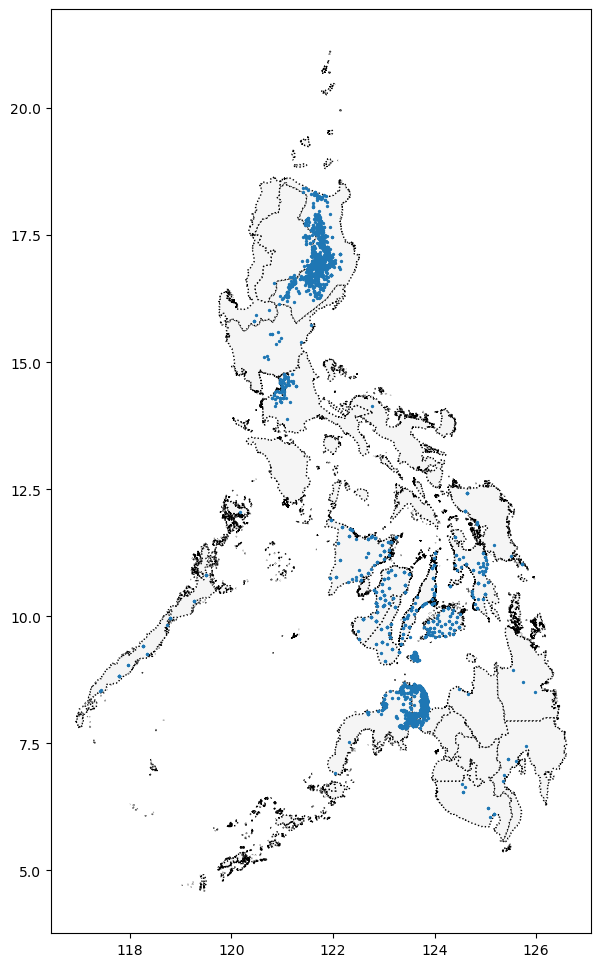

In [19]:
ax=PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax, markersize=2)

In [20]:
####cordinate reference

In [23]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString


In [24]:
regions = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\ghana\\ghana\\Regions\\Map_of_Regions_in_Ghana.shp")
print(regions.crs)

EPSG:32630


In [25]:
facilities_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\ghana\\ghana\\health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

C:\Users\DELL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude                  geometry  
0      Afrancho        CHAG   7.40801   -1.96317  POINT (-1.96317 7.40801)  
1  Anwiankwanta     Private   6.46312   -1.58592  POINT (-1.58592 6.46312)  
2   Aboabo No 2  Government   6.22393   -1.34982  POINT (-1.34982 6.22393)  
3     Aboabogya  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)  
4        Aboaso  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)

<Axes: >

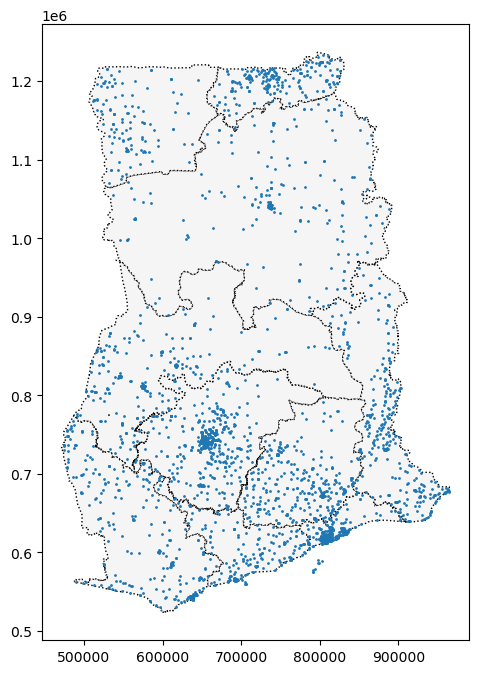

In [26]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [27]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude  \
0      Afrancho        CHAG   7.40801   -1.96317   
1  Anwiankwanta     Private   6.46312   -1.58592   
2   Aboabo No 2  Government   6.22393   -1.34982   
3     Aboabogya  Government   6.84177   -1.61098   
4        Aboaso  Government   6.84177   -1.61098   

                        geometry  
0  POINT (614422.662 818986.851)  
1  POINT (656373.863 714616.547)  
2  POINT (682573.395 688243.477)  
3  POINT (653484.490 756478.812)  
4  POINT (653484.490 756478.812)

In [28]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

Region                                           geometry
0        Ashanti  POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ...
1    Brong Ahafo  POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ...
2        Central  POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ...
3        Eastern  POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ...
4  Greater Accra  POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0....

In [29]:
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [30]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


Region                                           geometry  \
0        Ashanti  POLYGON ((686446.075 842986.894, 686666.193 84...   
1    Brong Ahafo  POLYGON ((549970.457 968447.094, 550073.003 96...   
2        Central  POLYGON ((603176.584 695877.238, 603248.424 69...   
3        Eastern  POLYGON ((807307.254 797910.553, 807311.908 79...   
4  Greater Accra  POLYGON ((858081.638 676424.913, 858113.115 67...   

           AREA  
0  24379.017777  
1  40098.168231  
2   9665.626760  
3  18987.625847  
4   3706.511145

In [31]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


timestamp  location-long  location-lat  tag-local-identifier
0 2014-08-15 05:56:00     -88.146014     17.513049                 30448
1 2014-09-01 05:59:00     -85.243501     13.095782                 30448
2 2014-10-30 23:58:00     -62.906089     -7.852436                 30448
3 2014-11-15 04:59:00     -61.776826    -11.723898                 30448
4 2014-11-30 09:59:00     -61.241538    -11.612237                 30448

In [32]:
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"])) 

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs =  {'init' :'epsg:4326'}


C:\Users\DELL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [33]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10896\2146633488.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
3    37589262.0  North America                    Canada    CAN     1736425   
4   328239523.0  North America  United States of America    USA    21433226   
9    44938712.0  South America                 Argentina    ARG      445445   
10   18952038.0  South America                     Chile    CHL      282318   
16   11263077.0  North America                     Haiti    HTI       14332   

                                             geometry  
3   MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4   MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
16  POLYGON ((-71.71236 19.71446, -71.62487 19.169...

<Axes: >

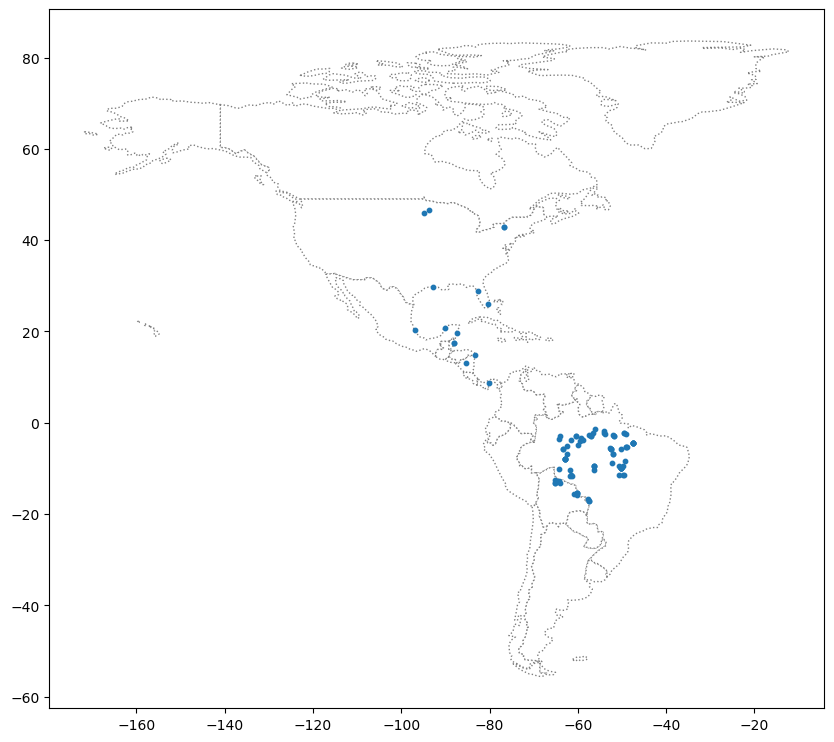

In [34]:
# Your code here

ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)

# Uncomment to see a hint
#q_2.hint()

(-30.0, 60.0)

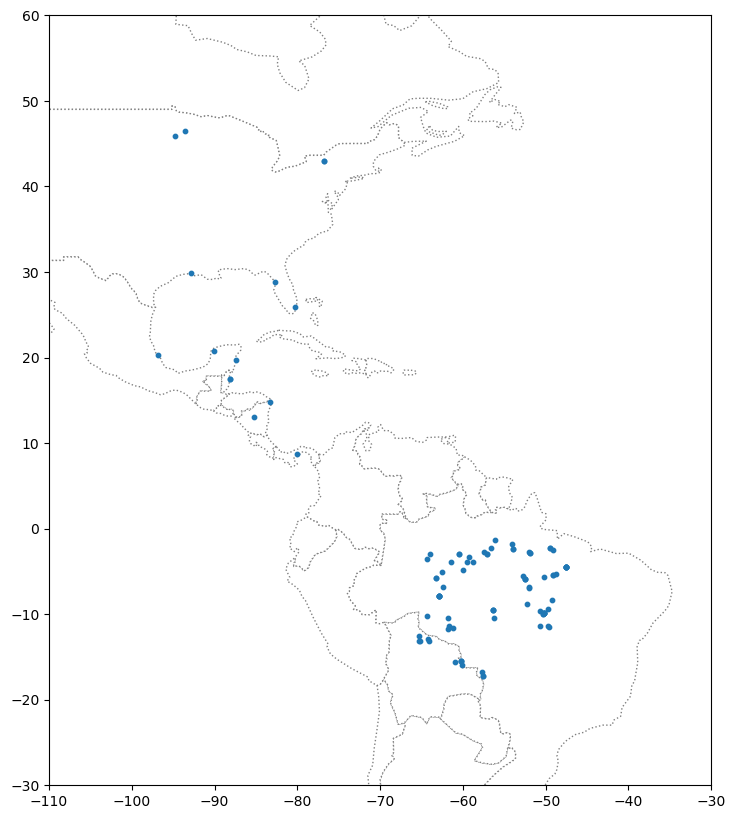

In [35]:
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)


ax.set_xlim([-110, -30])
ax.set_ylim([-30, 60])


In [36]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

C:\Users\DELL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\DELL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


tag-local-identifier                    geometry
0                 30048  POINT (-90.12992 20.73242)
1                 30054  POINT (-93.60861 46.50563)
2                 30198  POINT (-80.31036 25.92545)
3                 30263  POINT (-76.78146 42.99209)
4                 30275  POINT (-76.78213 42.99207)

In [37]:
# Your code here
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf =gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}

C:\Users\DELL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

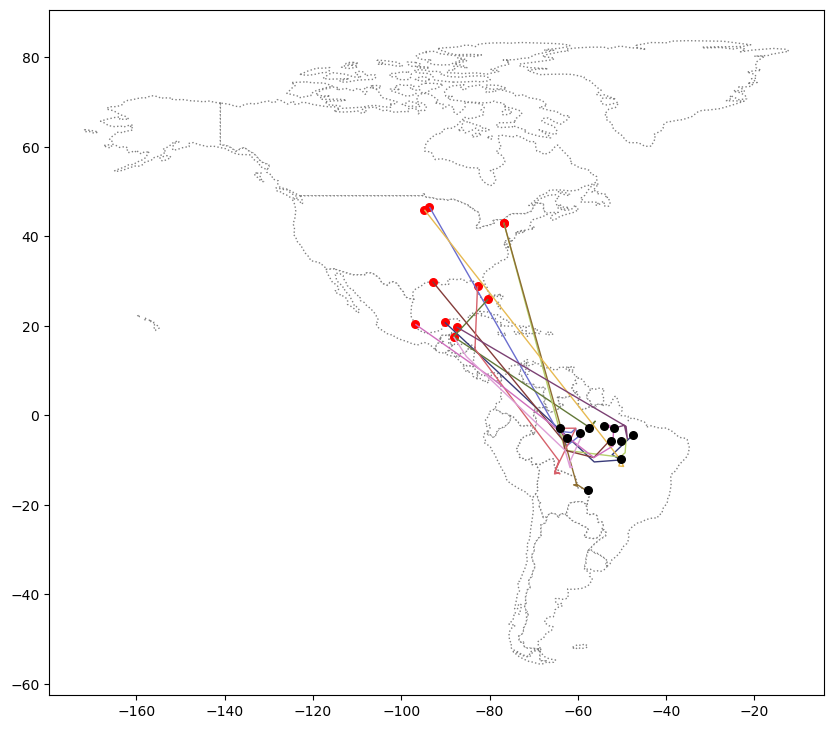

In [38]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

In [39]:
# Path of the shapefile to load
protected_filepath = "C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\SAPA_Aug2019-shapefile\\SAPA_Aug2019-shapefile\\SAPA_Aug2019-shapefile-polygons.shp"

# Your code here
protected_areas =gpd.read_file(protected_filepath) 


In [40]:
protected_areas = gpd.read_file(protected_filepath)

<Axes: >

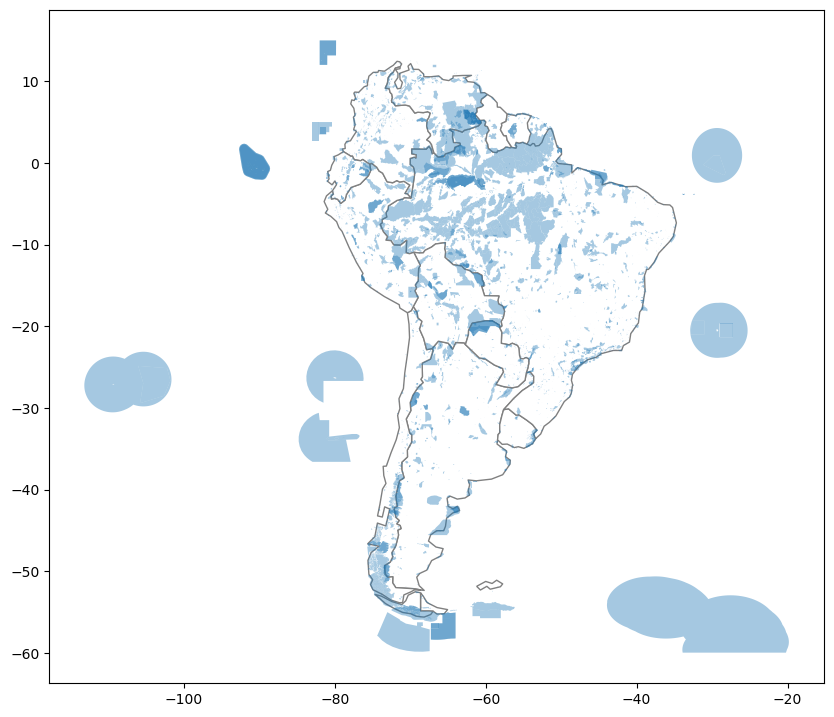

In [41]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# Your code here: plot protected areas in South America

 #Plot protected areas in South America
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)

<Axes: >

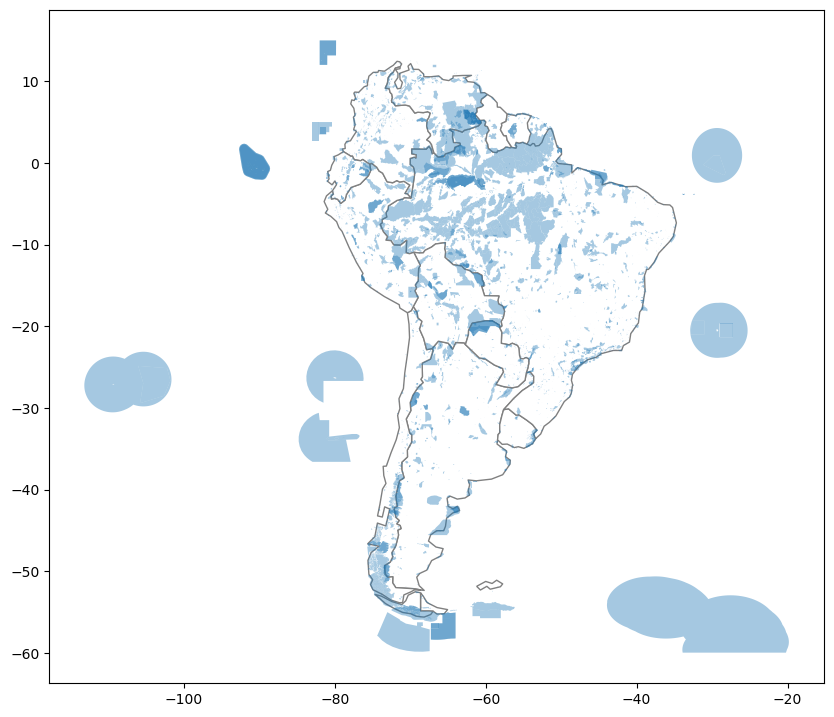

In [42]:
# Plot protected areas in South America
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)


In [43]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [44]:
south_america.head()

pop_est      continent          name iso_a3  gdp_md_est  \
9    44938712.0  South America     Argentina    ARG      445445   
10   18952038.0  South America         Chile    CHL      282318   
20       3398.0  South America  Falkland Is.    FLK         282   
28    3461734.0  South America       Uruguay    URY       56045   
29  211049527.0  South America        Brazil    BRA     1839758   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
20  POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...  
28  POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...

In [45]:
# Your code here: Calculate the total area of South America (in square kilometers)
totalArea =sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6

In [46]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


<Axes: >

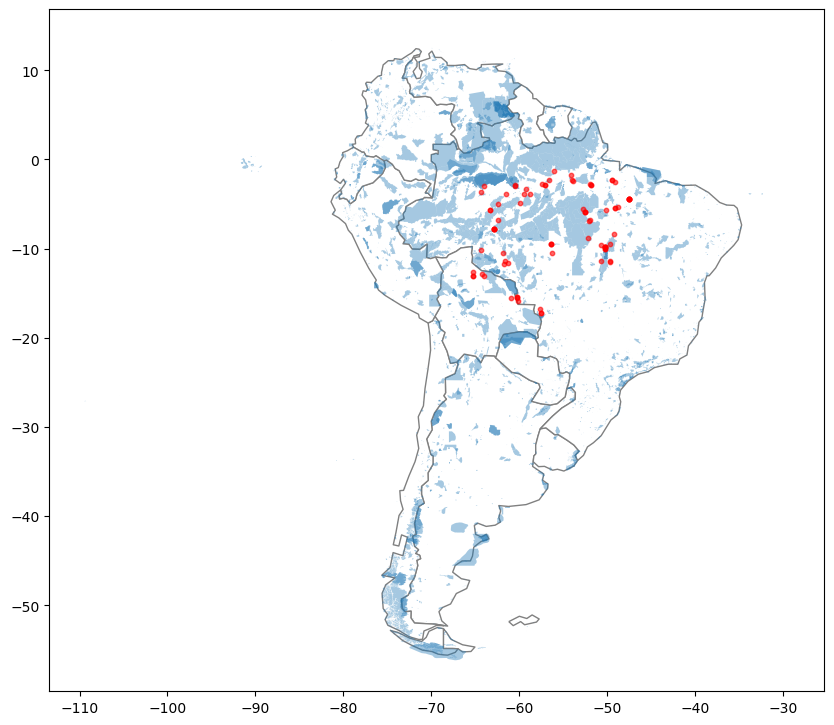

In [47]:
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)


In [48]:
###interactive map

In [49]:
import pandas as pd
import geopandas as gpd
import math

In [51]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [57]:
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

In [58]:
# Load the data
crimes = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\crimes-in-boston\\crimes-in-boston\\crime.csv", encoding='latin-1')

# Drop rows with missing locations
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]

In [59]:
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]

In [60]:
# Create a map
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(m_2)

# Display the map
m_2

In [61]:
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m_3.add_child(mc)

# Display the map
m_3

In [62]:
# Create a base map
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
        location=[daytime_robberies.iloc[i]['Lat'], daytime_robberies.iloc[i]['Long']],
        radius=20,
        color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4)

# Display the map
m_4

In [63]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
m_5

In [64]:
# GeoDataFrame with geographical boundaries of Boston police districts
districts_full = gpd.read_file('C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\Police_Districts\\Police_Districts\\Police_Districts.shp')
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

geometry
DISTRICT                                                   
A15       MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ...
A7        MULTIPOLYGON (((-70.99644 42.39557, -70.99644 ...
A1        POLYGON ((-71.05200 42.36884, -71.05169 42.368...
C6        POLYGON ((-71.04406 42.35403, -71.04412 42.353...
D4        POLYGON ((-71.07416 42.35724, -71.07359 42.357...

In [66]:
# Number of crimes in each police district
plot_dict = crimes.DISTRICT.value_counts()
plot_dict.head()

DISTRICT
D4     2885
B2     2231
A1     2130
C11    1899
B3     1421
Name: count, dtype: int64

In [67]:
m_6 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=districts.__geo_interface__, 
           data=plot_dict, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Major criminal incidents (Jan-Aug 2018)'
          ).add_to(m_6)

# Display the map
m_6

In [69]:
import pandas as pd
import geopandas as gpd

import folium
from folium import Choropleth
from folium.plugins import HeatMap



In [70]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [71]:
plate_boundaries = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\Plate_Boundaries\\Plate_Boundaries\\Plate_Boundaries.shp")
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries.drop('geometry', axis=1, inplace=True)

plate_boundaries.head()

HAZ_PLATES                                         HAZ_PLAT_1  HAZ_PLAT_2  \
0     TRENCH                              SERAM TROUGH (ACTIVE)        6722   
1     TRENCH                                       WETAR THRUST        6722   
2     TRENCH  TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...        6621   
3     TRENCH                                       BONIN TRENCH        9821   
4     TRENCH                                  NEW GUINEA TRENCH        8001   

   Shape_Leng                                        coordinates  
0    5.843467  [(-5.444200361999947, 133.6808931800001), (-5....  
1    1.829013  [(-7.760600482999962, 125.47879802900002), (-7...  
2    6.743604  [(19.817899819000047, 120.09999798800004), (19...  
3    8.329381  [(26.175899215000072, 143.20620700100005), (26...  
4   11.998145  [(0.41880004000006466, 132.8273013480001), (0....

In [72]:
earthquakes = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\earthquakes1970-2014.csv", parse_dates=["DateTime"])
earthquakes.head()

DateTime  Latitude  Longitude  Depth  Magnitude MagType  \
0 1970-01-04 17:00:40.200    24.139    102.503   31.0        7.5      Ms   
1 1970-01-06 05:35:51.800    -9.628    151.458    8.0        6.2      Ms   
2 1970-01-08 17:12:39.100   -34.741    178.568  179.0        6.1      Mb   
3 1970-01-10 12:07:08.600     6.825    126.737   73.0        6.1      Mb   
4 1970-01-16 08:05:39.000    60.280   -152.660   85.0        6.0      ML   

   NbStations  Gap  Distance  RMS Source       EventID  
0        90.0  NaN       NaN  0.0    NEI  1.970010e+09  
1        85.0  NaN       NaN  0.0    NEI  1.970011e+09  
2        59.0  NaN       NaN  0.0    NEI  1.970011e+09  
3        91.0  NaN       NaN  0.0    NEI  1.970011e+09  
4         0.0  NaN       NaN  NaN     AK           NaN

In [73]:
# Create a base map with plate boundaries
m_1 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_1)

# Your code here: Add a heatmap to the map
 #Add a heatmap to the map
HeatMap(data=earthquakes[['Latitude', 'Longitude']], radius=15).add_to(m_1)


In [76]:
embed_map(m_1, 'q_1.html')

In [79]:
# Create a base map with plate boundaries
m_2 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_2)
    
# Your code here: Add a map to visualize earthquake depth
# Custom function to assign a color to each circle
def color_producer(val):
    if val < 50:
        return 'forestgreen'
    elif val < 100:
        return 'darkorange'
    else:
        return 'darkred'

# Uncomment to see a hint
#q_2.a.hint()

# View the map
embed_map(m_2, 'q_2.html')

In [83]:

# Custom function to assign a color to each circle
def color_producer(val):
    if val < 50:
        return 'forestgreen'
    elif val < 100:
        return 'darkorange'
    else:
        return 'darkred'

# Add a map to visualize earthquake depth
for i in range(0,len(earthquakes)):
    folium.Circle(
        location=[earthquakes.iloc[i]['Latitude'], earthquakes.iloc[i]['Longitude']],
        radius=2000,
        color=color_producer(earthquakes.iloc[i]['Depth'])).add_to(m_2)

    embed_map(m_2, 'q_2.html')


KeyboardInterrupt: 

In [84]:
# GeoDataFrame with prefecture boundaries
prefectures = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\japan-prefecture-boundaries\\japan-prefecture-boundaries\\japan-prefecture-boundaries.shp")
prefectures.set_index('prefecture', inplace=True)
prefectures.head()

geometry
prefecture                                                   
Aichi       MULTIPOLYGON (((137.09523 34.65330, 137.09546 ...
Akita       MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...
Aomori      MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...
Chiba       MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...
Ehime       MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...

In [85]:
# DataFrame containing population of each prefecture
population = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\japan-prefecture-population.csv")
population.set_index('prefecture', inplace=True)

# Calculate area (in square kilometers) of each prefecture
area_sqkm = pd.Series(prefectures.geometry.to_crs(epsg=32654).area / 10**6, name='area_sqkm')
stats = population.join(area_sqkm)

# Add density (per square kilometer) of each prefecture
stats['density'] = stats["population"] / stats["area_sqkm"]
stats.head()

population    area_sqkm      density
prefecture                                      
Tokyo         12868000  1800.614782  7146.448049
Kanagawa       8943000  2383.038975  3752.771186
Osaka          8801000  1923.151529  4576.342460
Aichi          7418000  5164.400005  1436.372085
Saitama        7130000  3794.036890  1879.264806

In [88]:
m_3 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: create a choropleth map to visualize population density
# Create a choropleth map to visualize population density
Choropleth(geo_data=prefectures['geometry'].__geo_interface__,
           data=stats['density'],
           key_on="feature.id",
           fill_color='YlGnBu',
           legend_name='Population density (per square kilometer)'
          ).add_to(m_3)

# Uncomment to see a hint
#q_3.a.hint()

# View the map
embed_map(m_3, 'q_3.html')

In [89]:
###mmanipulating geospatial data

In [105]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium import Marker
import warnings 
warnings.filterwarnings('ignore')

In [106]:
from geopy.geocoders import Nominatim

In [108]:
geolocator = Nominatim(user_agent="kaggle_learn")
location = geolocator.geocode("Pyramid of Khufu")

print(location.point)
print(location.address)

29 58m 44.9927s N, 31 8m 3.16774s E
هرم خوفو, شارع ابو الهول السياحي, كوم الأخضر, الجيزة, 12125, مصر


In [109]:
point = location.point
print("Latitude:", point.latitude)
print("Longitude:", point.longitude)

Latitude: 29.97916465
Longitude: 31.13421326082681


In [110]:
universities = pd.read_csv("C:\\Users\\DELL\Downloads\\kaggle3\\geo document\\top_universities.csv")
universities.head()

Name
0     University of Oxford
1  University of Cambridge
2  Imperial College London
3               ETH Zurich
4                      UCL

In [111]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

universities[['Latitude', 'Longitude']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(universities["Latitude"])) / len(universities)) * 100))

# Drop universities that were not successfully geocoded
universities = universities.loc[~np.isnan(universities["Latitude"])]
universities = gpd.GeoDataFrame(
    universities, geometry=gpd.points_from_xy(universities.Longitude, universities.Latitude))
universities.crs = {'init': 'epsg:4326'}
universities.head()

79.0% of addresses were geocoded!


Name   Latitude  Longitude                   geometry
0     University of Oxford  51.758708  -1.255668  POINT (-1.25567 51.75871)
1  University of Cambridge  52.210946   0.092005   POINT (0.09200 52.21095)
2  Imperial College London  51.498959  -0.175641  POINT (-0.17564 51.49896)
3               ETH Zurich  47.562772   7.580947   POINT (7.58095 47.56277)
4                      UCL  51.521785  -0.135151  POINT (-0.13515 51.52179)

In [112]:
# Create a map
m = folium.Map(location=[54, 15], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in universities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(m)

# Display the map
m

In [113]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world.loc[world.continent == 'Europe'].reset_index(drop=True)

europe_stats = europe[["name", "pop_est", "gdp_md_est"]]
europe_boundaries = europe[["name", "geometry"]]

In [114]:
europe_boundaries.head()

name                                           geometry
0   Russia  MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...
1   Norway  MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...
2   France  MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
3   Sweden  POLYGON ((11.02737 58.85615, 11.46827 59.43239...
4  Belarus  POLYGON ((28.17671 56.16913, 29.22951 55.91834...

In [115]:
europe_stats.head()

name      pop_est  gdp_md_est
0   Russia  144373535.0     1699876
1   Norway    5347896.0      403336
2   France   67059887.0     2715518
3   Sweden   10285453.0      530883
4  Belarus    9466856.0       63080

In [116]:
# Use an attribute join to merge data about countries in Europe
europe = europe_boundaries.merge(europe_stats, on="name")
europe.head()

name                                           geometry      pop_est  \
0   Russia  MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...  144373535.0   
1   Norway  MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...    5347896.0   
2   France  MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...   67059887.0   
3   Sweden  POLYGON ((11.02737 58.85615, 11.46827 59.43239...   10285453.0   
4  Belarus  POLYGON ((28.17671 56.16913, 29.22951 55.91834...    9466856.0   

   gdp_md_est  
0     1699876  
1      403336  
2     2715518  
3      530883  
4       63080

In [117]:
# Use spatial join to match universities to countries in Europe
european_universities = gpd.sjoin(universities, europe)

# Investigate the result
print("We located {} universities.".format(len(universities)))
print("Only {} of the universities were located in Europe (in {} different countries).".format(
    len(european_universities), len(european_universities.name.unique())))

european_universities.head()

We located 79 universities.
Only 77 of the universities were located in Europe (in 15 different countries).


Name   Latitude  Longitude                   geometry  \
0     University of Oxford  51.758708  -1.255668  POINT (-1.25567 51.75871)   
1  University of Cambridge  52.210946   0.092005   POINT (0.09200 52.21095)   
2  Imperial College London  51.498959  -0.175641  POINT (-0.17564 51.49896)   
3               ETH Zurich  47.562772   7.580947   POINT (7.58095 47.56277)   
4                      UCL  51.521785  -0.135151  POINT (-0.13515 51.52179)   

   index_right            name     pop_est  gdp_md_est  
0           28  United Kingdom  66834405.0     2829108  
1           28  United Kingdom  66834405.0     2829108  
2           28  United Kingdom  66834405.0     2829108  
3           19     Switzerland   8574832.0      703082  
4           28  United Kingdom  66834405.0     2829108

In [122]:
import math
import pandas as pd
import geopandas as gpd


import folium 
from folium import Marker
from folium.plugins import MarkerCluster

In [123]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [125]:
starbucks = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\starbucks_locations.csv")
starbucks.head()

Store Number               Store Name  \
0  10429-100710       Palmdale & Hwy 395   
1       635-352    Kanan & Thousand Oaks   
2   74510-27669  Vons-Agoura Hills #2001   
3  29839-255026    Target Anaheim T-0677   
4  23463-230284   Safeway - Alameda 3281   

                                   Address          City  Longitude  Latitude  
0             14136 US Hwy 395 Adelanto CA      Adelanto    -117.40     34.51  
1                5827 Kanan Road Agoura CA        Agoura    -118.76     34.16  
2           5671 Kanan Rd. Agoura Hills CA  Agoura Hills    -118.76     34.15  
3  8148 E SANTA ANA CANYON ROAD AHAHEIM CA       AHAHEIM    -117.75     33.87  
4               2600 5th Street Alameda CA       Alameda    -122.28     37.79

In [126]:
# How many rows in each column have missing values?
print(starbucks.isnull().sum())

# View rows with missing locations
rows_with_missing = starbucks[starbucks["City"]=="Berkeley"]
rows_with_missing

Store Number    0
Store Name      0
Address         0
City            0
Longitude       5
Latitude        5
dtype: int64


Store Number                Store Name  \
153      5406-945  2224 Shattuck - Berkeley   
154       570-512                Solano Ave   
155  17877-164526   Safeway - Berkeley #691   
156  19864-202264         Telegraph & Ashby   
157     9217-9253           2128 Oxford St.   

                               Address      City  Longitude  Latitude  
153   2224 Shattuck Avenue Berkeley CA  Berkeley        NaN       NaN  
154     1799 Solano Avenue Berkeley CA  Berkeley        NaN       NaN  
155    1444 Shattuck Place Berkeley CA  Berkeley        NaN       NaN  
156  3001 Telegraph Avenue Berkeley CA  Berkeley        NaN       NaN  
157     2128 Oxford Street Berkeley CA  Berkeley        NaN       NaN

In [129]:
# Create the geocoder
geolocator = Nominatim(user_agent="kaggle_learn")

# Your code here

def my_geocoder(row):
    point = geolocator.geocode(row).point
    return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})

berkeley_locations = rows_with_missing.apply(lambda x: my_geocoder(x['Address']), axis=1)
starbucks.update(berkeley_locations)

In [130]:
# Create a base map
m_2 = folium.Map(location=[37.88,-122.26], zoom_start=13)

# Your code here: Add a marker for each Berkeley location
# Add a marker for each Berkeley location
for idx, row in starbucks[starbucks["City"]=='Berkeley'].iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_2)

# Uncomment to see a hint
#q_2.a.hint()

# Show the map
embed_map(m_2, 'q_2.html')

In [131]:
CA_counties = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\CA_county_boundaries\\CA_county_boundaries\\CA_county_boundaries.shp")
CA_counties.crs = {'init': 'epsg:4326'}
CA_counties.head()

GEOID                  name    area_sqkm  \
0   6091         Sierra County  2491.995494   
1   6067     Sacramento County  2575.258262   
2   6083  Santa Barbara County  9813.817958   
3   6009      Calaveras County  2685.626726   
4   6111        Ventura County  5719.321379   

                                            geometry  
0  POLYGON ((-120.65560 39.69357, -120.65554 39.6...  
1  POLYGON ((-121.18858 38.71431, -121.18732 38.7...  
2  MULTIPOLYGON (((-120.58191 34.09856, -120.5822...  
3  POLYGON ((-120.63095 38.34111, -120.63058 38.3...  
4  MULTIPOLYGON (((-119.63631 33.27304, -119.6360...

In [132]:
CA_pop = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\CA_county_population.csv", index_col="GEOID")
CA_high_earners = pd.read_csv("C:\\Users\\DELL\Downloads\\kaggle3\\geo document\\CA_county_high_earners.csv", index_col="GEOID")
CA_median_age = pd.read_csv("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\CA_county_median_age.csv", index_col="GEOID")

In [133]:
cols_to_add = CA_pop.join([CA_high_earners, CA_median_age]).reset_index()
CA_stats = CA_counties.merge(cols_to_add, on="GEOID")
CA_stats = CA_counties.merge(cols_to_add, on="GEOID")


In [138]:
CA_stats["density"] = CA_stats["population"] / CA_stats["area_sqkm"]

In [139]:
# Your code here
sel_counties = CA_stats[((CA_stats.high_earners > 100000) &
                         (CA_stats.median_age < 38.5) &
                         (CA_stats.density > 285) &
                         ((CA_stats.median_age < 35.5) |
                         (CA_stats.density > 1400) |
                         (CA_stats.high_earners > 500000)))]


In [140]:
starbucks_gdf = gpd.GeoDataFrame(starbucks, geometry=gpd.points_from_xy(starbucks.Longitude, starbucks.Latitude))
starbucks_gdf.crs = {'init': 'epsg:4326'}

In [141]:
# Fill in your answer
locations_of_interest = gpd.sjoin(starbucks_gdf, sel_counties)
num_stores =len(locations_of_interest) 


In [143]:
# Create a base map
m_6 = folium.Map(location=[37,-120], zoom_start=6)

# Your code here: show selected store locations
mc = MarkerCluster()

locations_of_interest = gpd.sjoin(starbucks_gdf, sel_counties)
for idx, row in locations_of_interest.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(folium.Marker([row['Latitude'], row['Longitude']]))

m_6.add_child(mc)

# Uncomment to see a hint
#q_6.hint()

# Show the map
embed_map(m_6, 'q_6.html')

In [144]:
import folium
from folium import Marker, GeoJson
from folium.plugins import HeatMap

import pandas as pd
import geopandas as gpd

In [148]:
releases = gpd.read_file("C:\\Users\\DELL\Downloads\\kaggle3\\geo document\\toxic_release_pennsylvania\\toxic_release_pennsylvania\\toxic_release_pennsylvania.shp") 
releases.head()

YEAR          CITY        COUNTY  ST   LATITUDE  LONGITUDE  \
0  2016  PHILADELPHIA  PHILADELPHIA  PA  40.005901 -75.072103   
1  2016  PHILADELPHIA  PHILADELPHIA  PA  39.920120 -75.146410   
2  2016  PHILADELPHIA  PHILADELPHIA  PA  40.023880 -75.220450   
3  2016  PHILADELPHIA  PHILADELPHIA  PA  39.913540 -75.198890   
4  2016  PHILADELPHIA  PHILADELPHIA  PA  39.913540 -75.198890   

                CHEMICAL UNIT_OF_ME  TOTAL_RELE  \
0            FORMIC ACID     Pounds       0.160   
1        ETHYLENE GLYCOL     Pounds   13353.480   
2  CERTAIN GLYCOL ETHERS     Pounds     104.135   
3         LEAD COMPOUNDS     Pounds    1730.280   
4                BENZENE     Pounds   39863.290   

                         geometry  
0  POINT (2718560.227 256380.179)  
1  POINT (2698674.606 224522.905)  
2  POINT (2676833.394 261701.856)  
3  POINT (2684030.004 221697.388)  
4  POINT (2684030.004 221697.388)

In [149]:
stations = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\PhillyHealth_Air_Monitoring_Stations\\PhillyHealth_Air_Monitoring_Stations\\PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

SITE_NAME                         ADDRESS BLACK_CARB ULTRAFINE_ CO SO2  \
0       LAB       1501 East Lycoming Avenue          N          N  Y   N   
1       ROX        Eva and Dearnley Streets          N          N  N   N   
2       NEA  Grant Avenue and Ashton Street          N          N  N   N   
3       CHS          500 South Broad Street          N          N  N   N   
4       NEW               2861 Lewis Street          N          N  Y   Y   

  OZONE NO2 NOY_NO PM10  ... PAMS_VOC TSP_11101 TSP_METALS TSP_LEAD  \
0     Y   Y      Y    N  ...        Y         N          Y        N   
1     N   N      N    N  ...        N         N          Y        N   
2     Y   N      N    N  ...        N         N          N        N   
3     N   N      N    N  ...        N         N          Y        N   
4     Y   N      Y    Y  ...        N         Y          N        Y   

  TOXICS_TO1 MET COMMUNITY_   LATITUDE  LONGITUDE  \
0          y   N          N  40.008606 -75.097624   
1          Y   N          N  40.050461 -75.236966   
2          N   Y          N  40.072073 -75.013128   
3          Y   N          N  39.944510 -75.165442   
4          N   Y          N  39.991688 -75.080378   

                         geometry  
0  POINT (2711384.641 257149.310)  
1  POINT (2671934.290 271248.900)  
2  POINT (2734326.638 280980.247)  
3  POINT (2693078.580 233247.101)  
4  POINT (2716399.773 251134.976)  

[5 rows x 24 columns]

In [150]:
stations = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\PhillyHealth_Air_Monitoring_Stations\\PhillyHealth_Air_Monitoring_Stations\\PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

SITE_NAME                         ADDRESS BLACK_CARB ULTRAFINE_ CO SO2  \
0       LAB       1501 East Lycoming Avenue          N          N  Y   N   
1       ROX        Eva and Dearnley Streets          N          N  N   N   
2       NEA  Grant Avenue and Ashton Street          N          N  N   N   
3       CHS          500 South Broad Street          N          N  N   N   
4       NEW               2861 Lewis Street          N          N  Y   Y   

  OZONE NO2 NOY_NO PM10  ... PAMS_VOC TSP_11101 TSP_METALS TSP_LEAD  \
0     Y   Y      Y    N  ...        Y         N          Y        N   
1     N   N      N    N  ...        N         N          Y        N   
2     Y   N      N    N  ...        N         N          N        N   
3     N   N      N    N  ...        N         N          Y        N   
4     Y   N      Y    Y  ...        N         Y          N        Y   

  TOXICS_TO1 MET COMMUNITY_   LATITUDE  LONGITUDE  \
0          y   N          N  40.008606 -75.097624   
1          Y   N          N  40.050461 -75.236966   
2          N   Y          N  40.072073 -75.013128   
3          Y   N          N  39.944510 -75.165442   
4          N   Y          N  39.991688 -75.080378   

                         geometry  
0  POINT (2711384.641 257149.310)  
1  POINT (2671934.290 271248.900)  
2  POINT (2734326.638 280980.247)  
3  POINT (2693078.580 233247.101)  
4  POINT (2716399.773 251134.976)  

[5 rows x 24 columns]

In [151]:
print(stations.crs)
print(releases.crs)

EPSG:2272
EPSG:2272


In [152]:
# Select one release incident in particular
recent_release = releases.iloc[360]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [154]:
print('Mean distance to monitoring stations: {} feet'.format(distances.mean()))

Mean distance to monitoring stations: 33516.28487007786 feet


In [155]:
print('Closest monitoring station ({} feet):'.format(distances.min()))
print(stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]])

Closest monitoring station (3780.623590556444 feet):
ADDRESS      3100 Penrose Ferry Road
LATITUDE                    39.91279
LONGITUDE                 -75.185448
Name: 9, dtype: object


In [157]:
two_mile_buffer = stations.geometry.buffer(2*5280)
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [162]:
# Create map with release incidents and monitoring stations
m = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m)
    
# Plot each polygon on the map
GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m)

# Show the map
m

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


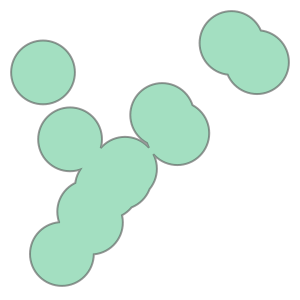

In [189]:
# Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union
print('Type:', type(my_union))

# Show the MultiPolygon object
my_union

In [164]:
# The closest station is less than two miles away
my_union.contains(releases.iloc[360].geometry)

True

In [161]:
# The closest station is more than two miles away
my_union.contains(releases.iloc[358].geometry)

False

In [167]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon

import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster

In [168]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [169]:
collisions = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\NYPD_Motor_Vehicle_Collisions\\NYPD_Motor_Vehicle_Collisions\\NYPD_Motor_Vehicle_Collisions.shp")
collisions.head()

DATE   TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  07/30/2019   0:00      BRONX    10464  40.841100 -73.784960   
1  07/30/2019   0:10     QUEENS    11423  40.710827 -73.770660   
2  07/30/2019   0:25       None     None  40.880318 -73.841286   
3  07/30/2019   0:35  MANHATTAN    10036  40.756744 -73.984590   
4  07/30/2019  10:00   BROOKLYN    11223  40.600090 -73.965910   

                  LOCATION       ON STREET     CROSS STRE  \
0     (40.8411, -73.78496)            None           None   
1   (40.710827, -73.77066)  JAMAICA AVENUE     188 STREET   
2  (40.880318, -73.841286)     BOSTON ROAD           None   
3   (40.756744, -73.98459)            None           None   
4    (40.60009, -73.96591)        AVENUE T  OCEAN PARKWAY   

                 OFF STREET  ...   CONTRIBU_2  CONTRIBU_3  CONTRIBU_4  \
0    121       PILOT STREET  ...  Unspecified        None        None   
1                      None  ...         None        None        None   
2                      None  ...         None        None        None   
3  155       WEST 44 STREET  ...         None        None        None   
4                      None  ...         None        None        None   

   UNIQUE KEY                           VEHICLE TY  \
0     4180045                                Sedan   
1     4180007                                Sedan   
2     4179575                                Sedan   
3     4179544                            Box Truck   
4     4180660  Station Wagon/Sport Utility Vehicle   

                            VEHICLE _1                           VEHICLE _2  \
0  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                 None   
2  Station Wagon/Sport Utility Vehicle                                 None   
3  Station Wagon/Sport Utility Vehicle                                 None   
4                                 Bike                                 None   

   VEHICLE _3 VEHICLE _4                        geometry  
0        None       None  POINT (1043750.211 245785.815)  
1        None       None  POINT (1047831.185 198333.171)  
2        None       None  POINT (1028139.293 260041.178)  
3        None       None   POINT (988519.261 214979.320)  
4        None       None   POINT (993716.669 157907.212)  

[5 rows x 30 columns]

In [ ]:
m_1 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the collision data
HeatMap(data=collisions[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m_1)

# Uncomment to see a hint
#q_1.hint()

# Show the map
embed_map(m_1, "q_1.html")

In [170]:
hospitals = gpd.read_file("C:\\Users\\DELL\\Downloads\\kaggle3\\geo document\\nyu_2451_34494\\nyu_2451_34494\\nyu_2451_34494.shp")
hospitals.head()

id                                               name  \
0  317000001H1178  BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...   
1  317000001H1164    BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION   
2  317000011H1175                               CALVARY HOSPITAL INC   
3  317000002H1165                              JACOBI MEDICAL CENTER   
4  317000008H1172             LINCOLN MEDICAL & MENTAL HEALTH CENTER   

                  address    zip factype   facname capacity capname  bcode  \
0    1650 Grand Concourse  10457    3102  Hospital      415    Beds  36005   
1         1276 Fulton Ave  10456    3102  Hospital      164    Beds  36005   
2  1740-70 Eastchester Rd  10461    3102  Hospital      225    Beds  36005   
3        1400 Pelham Pkwy  10461    3102  Hospital      457    Beds  36005   
4            234 E 149 St  10451    3102  Hospital      362    Beds  36005   

      xcoord    ycoord   latitude  longitude                        geometry  
0  1008872.0  246596.0  40.843490 -73.911010  POINT (1008872.000 246596.000)  
1  1011044.0  242204.0  40.831429 -73.903178  POINT (1011044.000 242204.000)  
2  1027505.0  248287.0  40.848060 -73.843656  POINT (1027505.000 248287.000)  
3  1027042.0  251065.0  40.855687 -73.845311  POINT (1027042.000 251065.000)  
4  1005154.0  236853.0  40.816758 -73.924478  POINT (1005154.000 236853.000)

In [ ]:
m_2 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the hospital locations
for idx, row in hospitals.iterrows():
    Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m_2)

# Uncomment to see a hint
#q_2.hint()
        
# Show the map
embed_map(m_2, "q_2.html")

In [171]:
# Your code here
coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(10000)
my_union = coverage.geometry.unary_union
outside_range = collisions.loc[~collisions["geometry"].apply(lambda x: my_union.contains(x))]

In [172]:
percentage = round(100*len(outside_range)/len(collisions), 2)
print("Percentage of collisions more than 10 km away from the closest hospital: {}%".format(percentage))

Percentage of collisions more than 10 km away from the closest hospital: 15.12%


In [173]:
def best_hospital(collision_location):
    idx_min = hospitals.geometry.distance(collision_location).idxmin()
    my_hospital = hospitals.iloc[idx_min]
    name = my_hospital["name"]
    return name
    return name

# Test your function: this should suggest CALVARY HOSPITAL INC
print(best_hospital(outside_range.geometry.iloc[0]))

CALVARY HOSPITAL INC


In [174]:
highest_demand = outside_range.geometry.apply(best_hospital).value_counts().idxmax()

In [187]:
m_6 = folium.Map(location=[40.7, -74], zoom_start=11) 

coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(10000)
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m_6)
HeatMap(data=outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m_6)
folium.LatLngPopup().add_to(m_6)

embed_map(m_6, 'm_6.html')

In [188]:
# Proposed location of hospital 1
lat_1 = 40.6714
long_1 = -73.8492

# Proposed location of hospital 2
lat_2 = 40.6702
long_2 = -73.7612
# Do not modify the code below this line
# Do not modify the code below this line

new_df = pd.DataFrame(
        {'Latitude': [lat_1, lat_2],
         'Longitude': [long_1, long_2]})
new_gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Longitude, new_df.Latitude))
new_gdf.crs = {'init' :'epsg:4326'}
new_gdf = new_gdf.to_crs(epsg=2263)
    # get new percentage
new_coverage = gpd.GeoDataFrame(geometry=new_gdf.geometry).buffer(10000)
new_my_union = new_coverage.geometry.unary_union
new_outside_range = outside_range.loc[~outside_range["geometry"].apply(lambda x: new_my_union.contains(x))]
new_percentage = round(100*len(new_outside_range)/len(collisions), 2)
print("(NEW) Percentage of collisions more than 10 km away from the closest hospital: {}%".format(new_percentage))
# Did you help the city to meet its goal?
    # make the map
m = folium.Map(location=[40.7, -74], zoom_start=11) 
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)
folium.GeoJson(new_coverage.geometry.to_crs(epsg=4326)).add_to(m)
for idx, row in new_gdf.iterrows():
        Marker([row['Latitude'], row['Longitude']]).add_to(m)
HeatMap(data=new_outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m)
folium.LatLngPopup().add_to(m)
display(embed_map(m, 'q_6.html'))

(NEW) Percentage of collisions more than 10 km away from the closest hospital: 9.12%
